In [1]:
#istallazioni

!pip install pandas
!pip install -U scikit-learn
!pip install matplotlib
!pip install numpy
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [68]:
#importo librerie

import numpy as np 
import pandas as pd
import seaborn as sns #libreria per visuzlizzazione di dati
import matplotlib.pyplot as plt

In [69]:
poke = pd.read_csv("pokemon.csv")


#importo test e train
X_test = pd.read_csv("test.csv")
X_train = pd.read_csv("train.csv")

comb = X_train

In [70]:
poke.head()
#possiamo già intravedere che il tipo 2 non è sempre definito

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [71]:
comb.head()

,Unnamed: 0,Winner,First_pokemon,Second_pokemon
0,21370,124,124,221
1,2470,1,323,1
2,13767,58,58,459
3,13316,491,180,491
4,26374,799,799,559


In [72]:
#verifico se ci sono valori mancanti nel dataset pokemon

poke.isnull().sum() #numero valori mancanti per ogni stat

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [73]:
comb.isnull().sum()

Unnamed: 0        0
Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [74]:
#ed effettivamente, nel dataset pokemon, 386 pokemon non hanno il tipo 2 e 1 pokemon non ha nome

In [75]:
#cerco l'indice del pokemon senza nome

print(poke[poke['Name'].isnull()])

     # Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
62  63  NaN  Fighting    NaN  65     105       60       60       70     95   

    Generation  Legendary  
62           1      False  


In [76]:
#il suo indice è 62
#vedo il pokemon successivo

print(poke['Name'][63])

Growlithe


In [77]:
#vedo il pokemon precedente

print(poke['Name'][61])

Mankey


In [78]:
#stando al sito pokemon.com/us/pokedex
#il pokemon dal nome mancante è Primeape

poke['Name'][62] = "Primeape"

<ipython-input-78-bfb6886dfe6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poke['Name'][62] = "Primeape"


In [79]:
#calcolo la percentuale di vittoria per ogni pokemon

vittorieTotali = comb.Winner.value_counts()


#numero vittorie per ogni pokemon

numeroVittorie = comb.groupby('Winner').count()


groupbySecond = comb.groupby('Second_pokemon').count()
groupbyFirst = comb.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print(str(groupbySecond.shape))
print(str(groupbyFirst.shape))
print("Totale: " + str(vittorieTotali.shape))

Looking at the dimensions of our dataframes
(784, 3)
(784, 3)
Totale: (783,)


In [80]:
#groupbySecond e groupbyFirst hanno la stessa shape, che differisce da quella delle vittorie totali
#quindi c'è un pokemon che non ha vinto neanche una partita

In [81]:
#cerco il pokemon in questione

ricerca= np.setdiff1d(groupbySecond.index.values, numeroVittorie.index.values)-1   #il -1 perché gli indici e il numero del pokemon (#) sono sfasati di una unità
pokemonCercato = poke.iloc[ricerca[0],]
print(pokemonCercato)

#                 231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


In [82]:
#vedo se ci sono pokemon che non hanno partecipato a nessuno scontro

numeroVittorie = numeroVittorie.sort_index()
numeroVittorie['Totale Battaglie'] = groupbySecond.Winner + groupbyFirst.Winner
numeroVittorie['Percentuale Vittorie']= numeroVittorie.First_pokemon/numeroVittorie['Totale Battaglie']


#unisco il dataset dei vincitori con il dataset pokemon originale, facendo corrispondere il valore di #

conPercentuale = pd.merge(poke, numeroVittorie, left_on='#', right_index = True, how='left')


conPercentuale[conPercentuale['Percentuale Vittorie'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Unnamed: 0,First_pokemon,Second_pokemon,Totale Battaglie,Percentuale Vittorie
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN,NaN


In [83]:
#e in effetti, ci sono diversi pokemon che non hanno partecipato a nessuna battaglia

Text(0.5, 1.0, 'Numero pokemon in base al tipo 1')

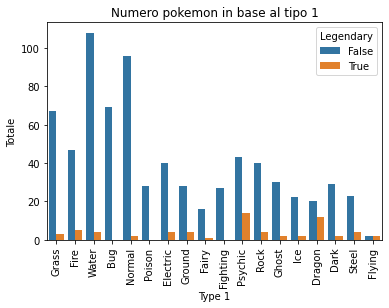

In [84]:
#visualizzo i dati

sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=conPercentuale)

plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Totale')
plt.title("Numero pokemon in base al tipo 1")

#il tipo acqua è il tipo 1 più comune, mentre volo è il tipo 1 più raro

Text(0.5, 1.0, 'Numero pokemon in base al tipo 2')

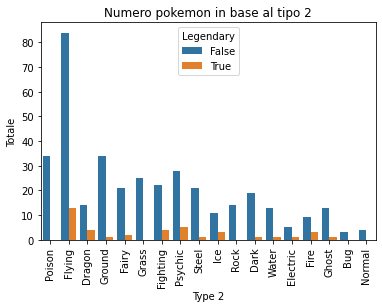

In [85]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=conPercentuale)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Totale')
plt.title("Numero pokemon in base al tipo 2")

#il tipo volo è il tipo 2 più comune, mentre insetto è il tipo 2 più raro

In [86]:
#vedo quali tipologie di pokemon hanno la più alta percentuale di vittoria, in base al tipo 1

conPercentuale.groupby('Type 1').agg({"Percentuale Vittorie": "mean"}).sort_values(by = "Percentuale Vittorie")

,Percentuale Vittorie
Type 1,
Fairy,0.327198
Rock,0.406682
Steel,0.428792
Grass,0.435688
Ice,0.435790
Bug,0.436810
Poison,0.442726
Water,0.468648
Fighting,0.471748


In [87]:
#i pokemon di tipo volo sembrano essere i favoriti.
#bisogna ricordare che alcuni tipi di pokemon hanno mosse con
#effetti indeboliti o amplificati a seconda di quale sia il tipo dell'avversario.
#questo succede ad esempio tra i tipi acqua e i tipi fuoco

#a questo punto possiamo scendere ancora più a fondo, analizzando le relazioni tra le varie stats

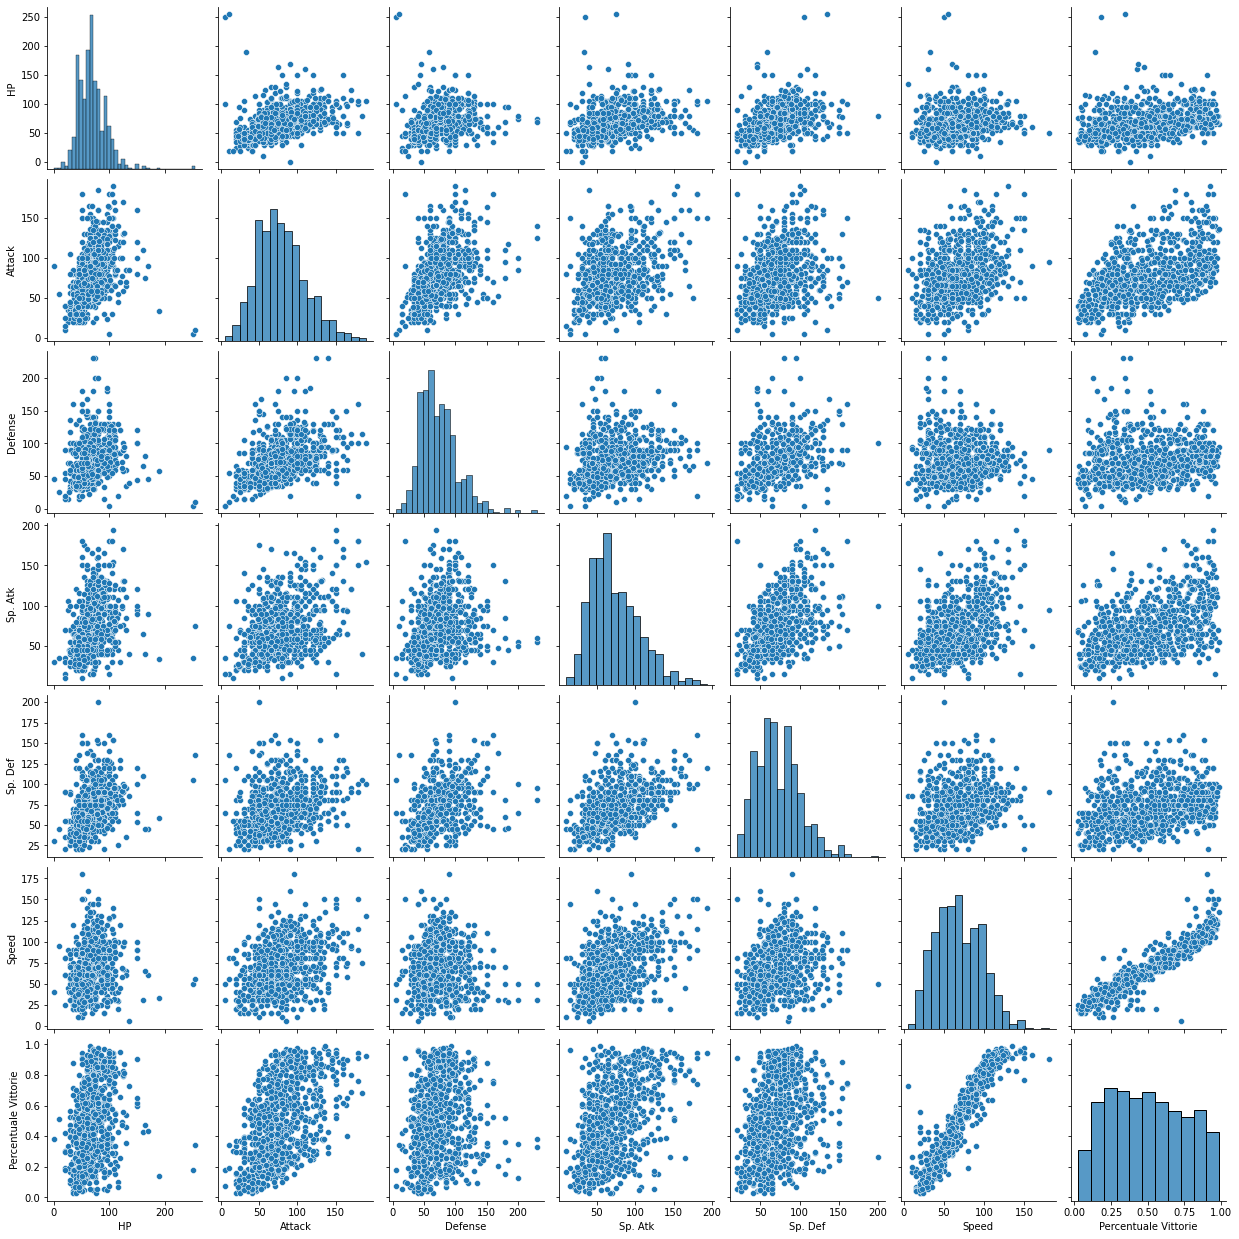

In [88]:
sns.pairplot(conPercentuale.loc[:,['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Percentuale Vittorie']].dropna())

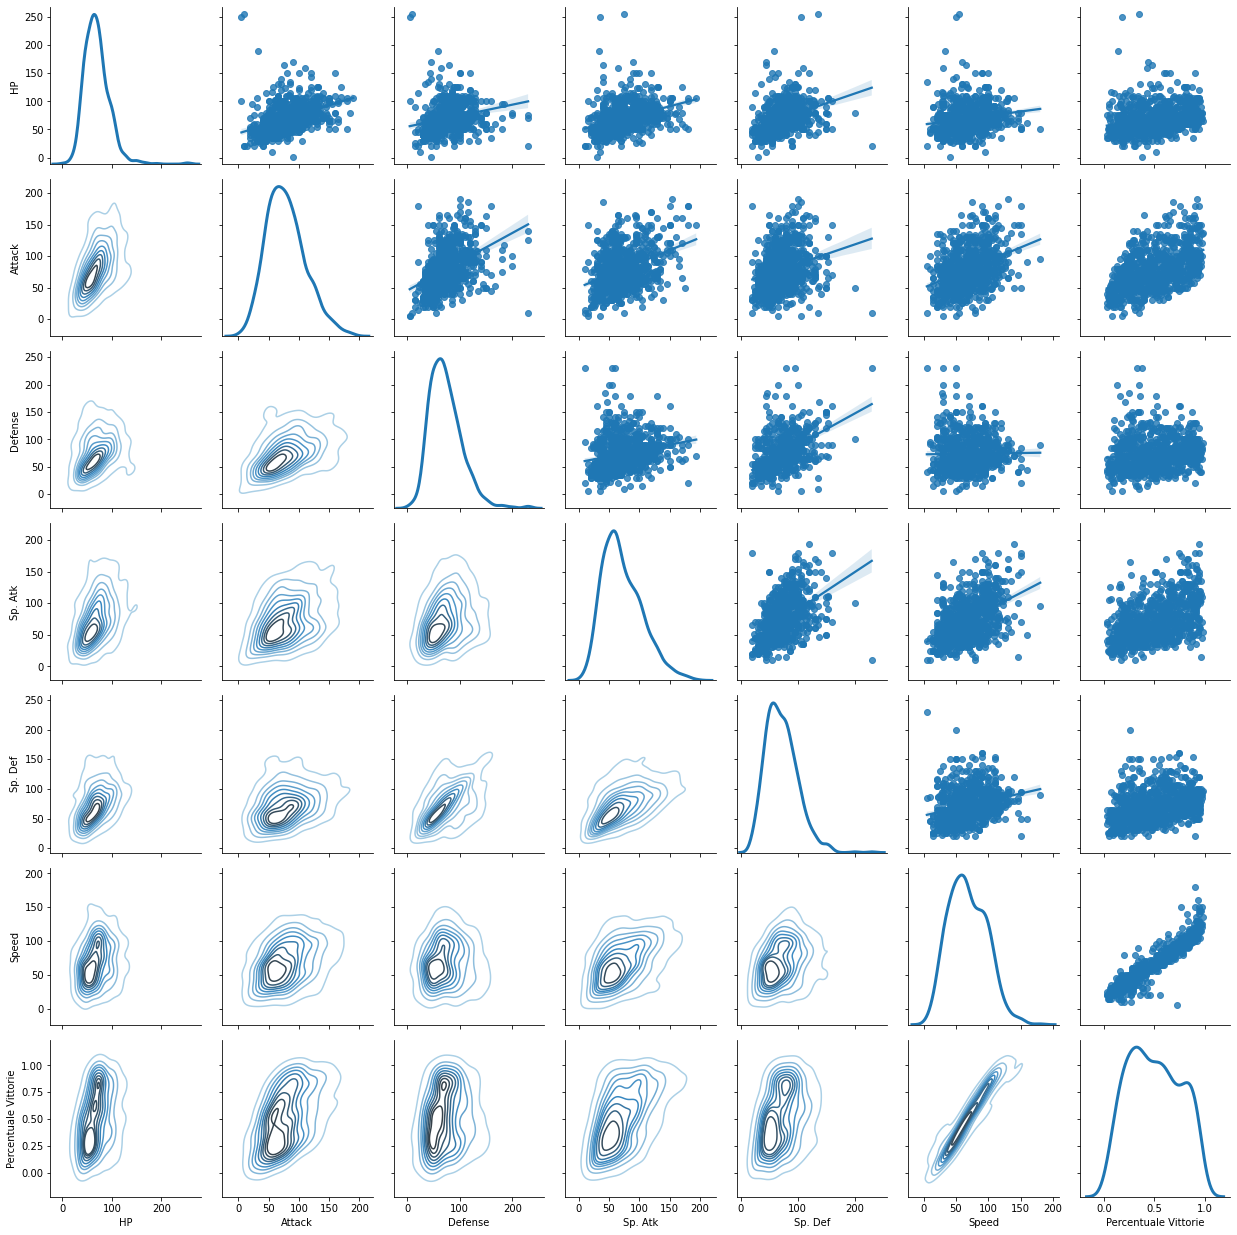

In [89]:
graph = sns.PairGrid(conPercentuale.loc[:,['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Percentuale Vittorie']], diag_sharey=False)
graph.map_lower(sns.kdeplot, cmap="Blues_d")
graph.map_upper(sns.regplot)
graph.map_diag(sns.kdeplot, lw=3)

In [90]:
#possiamo notare che in questo grafico si suddivide in tre tipologie di grafici.
#Quello che ci interesse maggiormente è la tipologia in alto a destra.
#La pendenza della diagonale che si intravede nei cluster indica quanto le due features su cui
#è formato il grafico sono correlate fra loro.

#Vediamo quali di queste features hanno la correlazione più alta con la feature Percentuale Vittorie

In [91]:
conPercentuale.loc[:,['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Percentuale Vittorie']].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Percentuale Vittorie
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.261293
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.496445
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.122439
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.474389
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.323147
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.932581
Percentuale Vittorie,0.261293,0.496445,0.122439,0.474389,0.323147,0.932581,1.000000


In [92]:
#TOP 3 FEATURES PIÙ RILEVANTI
#la velocità è la feature predominante nei pokemon vincenti, seguita dall'attacco e dalla Sp. Atk

In [96]:
dataset = pd.merge(poke, numeroVittorie, right_index = True, left_on='#')

In [100]:
#rimuovo le righe con valori NA perché potrebbero causare problemi con il fitting
dataset.dropna(axis=0, how='any')

#divido dataset
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

y_test = X_test.iloc[:,:1]
y_train = X_train.iloc[:,:1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [101]:
  
# Fitting Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
print(regressor.score(X_train, y_train))

# Predizione risultati successivi
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y_test, y_pred)
#Mean Absolute Error

ml_decisiontree(X_train, X_test, y_train, y_test)

0.9967690839105566
0.9967690839105566


9.959660297239916